In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

# Visualization - Bands and CSPM

In [176]:
data_path = 'generated/dataframes/'
charts_path = 'generated/charts/'
maps_path = 'generated/maps/'

In [177]:
bat_data = jb.load(f'{data_path}bat_dataframe.pkl.z')
bat_data

,x,y,z
0,236.782,1016.283,1.96
1,236.795,1016.285,1.98
2,236.807,1016.288,1.98
3,236.819,1016.291,1.97
4,236.831,1016.293,1.98
...,...,...,...
533307,618.304,0.091,7.93
533308,618.339,0.070,7.93
533309,618.375,0.049,7.93
533310,618.412,0.029,7.93


In [178]:
val_data = jb.load(f'{data_path}test_data.pkl.z')
val_data

,b1,b5,b6,cspmb7,z,x,y,rf_pred
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,4.133722
1,0.1199,0.0490,0.0316,23.382784,3.273030,233,1131,4.133722
2,0.1199,0.0488,0.0324,23.158824,3.299687,233,1132,4.095133
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,4.095133
4,0.1196,0.0489,0.0323,23.607309,3.278125,233,1134,3.884862
...,...,...,...,...,...,...,...,...
19302,0.1267,0.0473,0.0290,21.169079,2.594444,2292,85,3.926091
19303,0.1267,0.0473,0.0290,21.169079,2.428621,2293,85,3.926091
19304,0.1267,0.0475,0.0308,23.047057,2.264000,2293,86,5.480872
19305,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,2.662972


In [179]:
val_data['z_pred'] = val_data['rf_pred']
val_data.drop(['rf_pred'], axis=1, inplace=True)
val_data.head()

,b1,b5,b6,cspmb7,z,x,y,z_pred
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,4.133722
1,0.1199,0.0490,0.0316,23.382784,3.273030,233,1131,4.133722
2,0.1199,0.0488,0.0324,23.158824,3.299687,233,1132,4.095133
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,4.095133
4,0.1196,0.0489,0.0323,23.607309,3.278125,233,1134,3.884862


In [180]:
df_data = val_data
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [181]:
df_data

,b1,b5,b6,cspmb7,z,x,y,z_pred,error,abs_error
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,4.133722,0.937860,0.937860
1,0.1199,0.0490,0.0316,23.382784,3.273030,233,1131,4.133722,0.860692,0.860692
2,0.1199,0.0488,0.0324,23.158824,3.299687,233,1132,4.095133,0.795446,0.795446
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,4.095133,0.826951,0.826951
4,0.1196,0.0489,0.0323,23.607309,3.278125,233,1134,3.884862,0.606737,0.606737
...,...,...,...,...,...,...,...,...,...,...
19302,0.1267,0.0473,0.0290,21.169079,2.594444,2292,85,3.926091,1.331646,1.331646
19303,0.1267,0.0473,0.0290,21.169079,2.428621,2293,85,3.926091,1.497470,1.497470
19304,0.1267,0.0475,0.0308,23.047057,2.264000,2293,86,5.480872,3.216872,3.216872
19305,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,2.662972,0.753257,0.753257


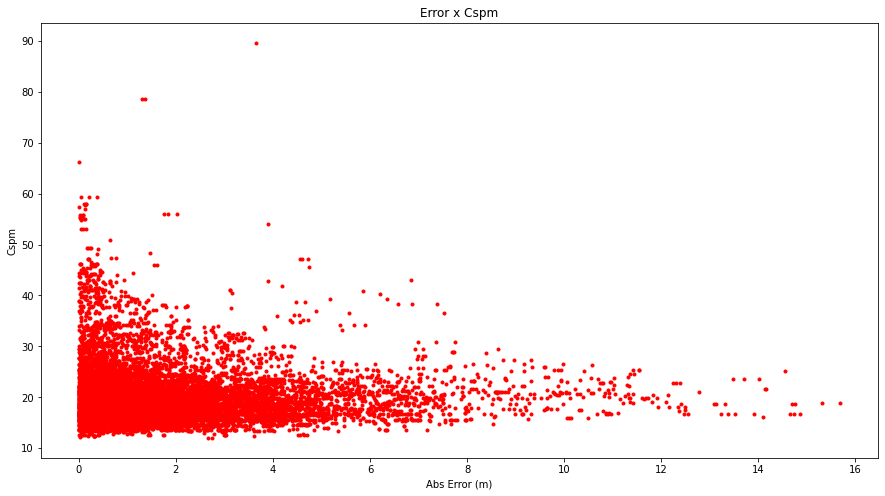

In [182]:
plt.figure(figsize=(15,8))
plt.plot(df_data['abs_error'], df_data['cspmb7'], 'r.')
plt.xlabel("Abs Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_abs_error_x_cspm.jpg')
#plt.grid()
plt.show()

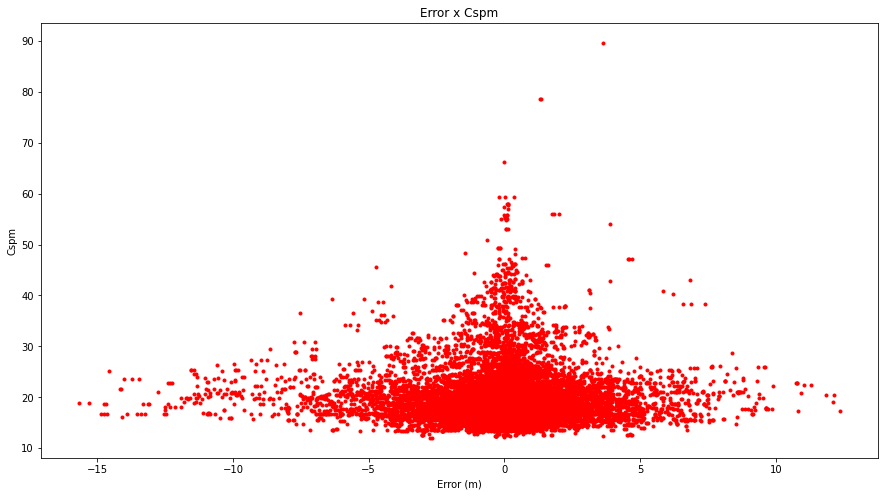

In [183]:
plt.figure(figsize=(15,8))
plt.plot(df_data['error'], df_data['cspmb7'], 'r.')
plt.xlabel("Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_error_x_cspm.jpg')
#plt.grid()
plt.show()

In [184]:
df_result = df_data.drop(['b1','b5','b6'],axis=1)

In [185]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [186]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,21.470889,2.173679,2.174050
1,2.0,21.256356,1.639467,1.657332
2,3.0,20.991467,1.287986,1.406891
3,4.0,21.199808,0.741461,1.117623
4,5.0,19.668030,0.309815,1.238905
5,6.0,19.495323,-0.074361,1.318957
6,7.0,19.035156,-0.534820,1.360271
7,8.0,18.897811,-0.628965,1.534511
8,9.0,18.580551,-0.973638,1.771519
9,10.0,18.525225,-1.077747,1.930385


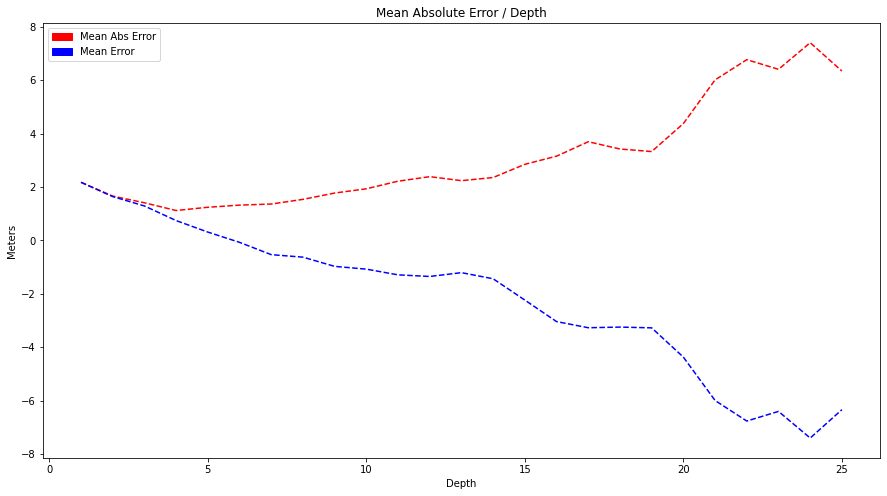

In [187]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_error.jpg')
plt.title('Mean Absolute Error / Depth')
#plt.grid()
plt.show()

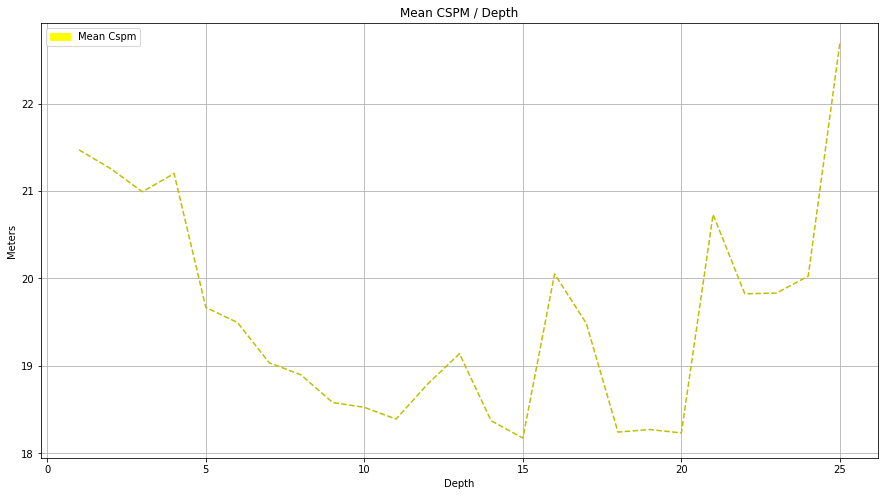

In [188]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_cspm.jpg')
plt.title('Mean CSPM / Depth')
plt.grid()
plt.show()

In [189]:
base_image = cv2.imread(f'{maps_path}rgb_image.jpg')

In [190]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row.x
    y = row.y
    transects_image[y][x] = [255,255,255]
cv2.imwrite(f'{maps_path}bat_transects.jpg',transects_image)

True

In [191]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row.x)
    y = int(row.y)
    abs_error = row.abs_error
    abs_error_image = cv2.circle(abs_error_image,(x,y),10,[int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))],15)
    #abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{maps_path}abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [192]:
cspm_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row.x)
    y = int(row.y)
    cspm = row.cspmb7
    #cspm_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(cspm/(df_data['cspmb7'].max()*1.2), 0.5, 1))]
    cspm_image = cv2.circle(cspm_image,(x,y),10,[int(e*255) for e in (colorsys.hls_to_rgb(cspm/(df_data['cspmb7'].max()*1.2), 0.5, 1))],15)

cv2.imwrite(f'{maps_path}cspm.jpg',cv2.cvtColor(cspm_image, cv2.COLOR_BGR2RGB))

True

In [193]:
def find_transect(x_s, y_s, x_e, y_e, df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for row in df_t.itertuples():
        x = row.x 
        y = row.y
        angle2 = math.atan2(y-y_e,x-x_e)
        #math.atan2(y-y_s,x-x_s)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [194]:
def generate_transect_charts(df_data, coords, path, mpath, df_bat,image=None):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)
    bat_transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_bat)
    
    if image is not None:
        transect_image = image.copy()
        for i, row in enumerate(transect):
            x = row.x # Change this to dynamic
            y = row.y # change this to dynamic
            transect_image = cv2.circle(transect_image,(x,y),5,[0,255,0],5)

        cv2.imwrite(f'{mpath}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)
        
    df_transect = pd.DataFrame(transect)
    #print(df_transect.head())
    #return None
    df_transect.drop(['Index'], axis=1, inplace=True)
    
    df_transect_bat = pd.DataFrame(bat_transect)
    #print(df_transect_bat.head())
    #return None
    df_transect_bat.drop(['Index'], axis=1, inplace=True)
   
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect_bat['x'],-df_transect_bat['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['cspmb7'], 'y.')
    lbl = mpatches.Patch(color='yellow', label='Cspm')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Cspm")
    plt.savefig(f'{path}cspm_{coords[0]}_{coords[1]}.jpg')


In [195]:
transect_coords = [#[510,410,680,310],
                   #[1604,142,1772,440],
                   #[871,1123,1190,939],
                   #[1020,705,1319,532],
                   #[706,1338,1028,1149],
                   #[1366,935,1130,523],
                   #[1081,1090,1020,983],
                   [494,417,689,303],
                   [510,294,617,233]]

#p2: 706 1338, 1028 1149
#p3: 1366 935, 1130 523
#p4: 1081 1090, 1020 983
#p5: 494 417, 689 303

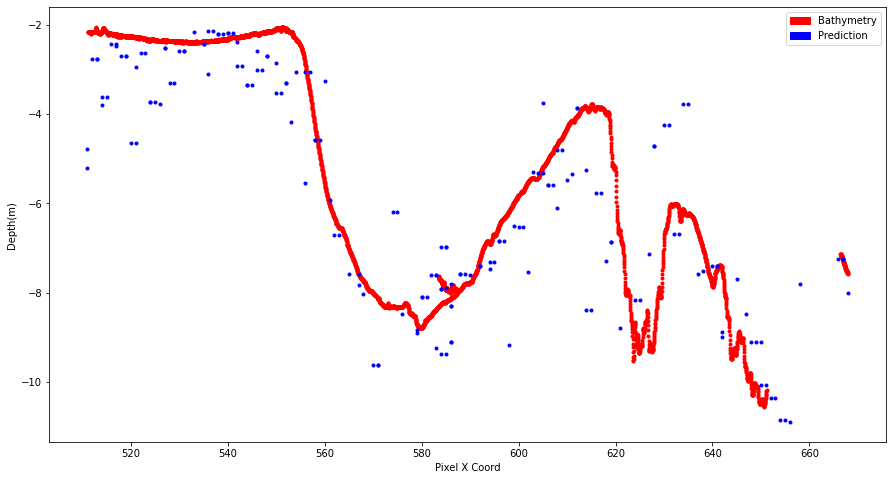

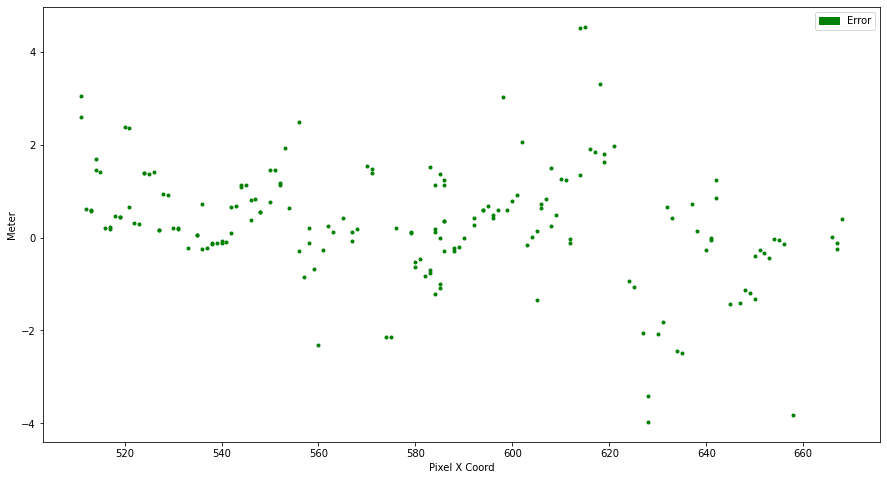

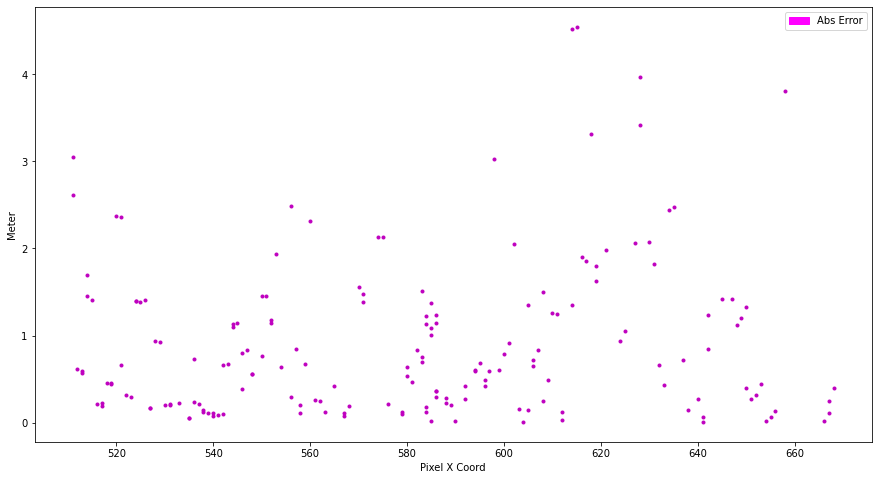

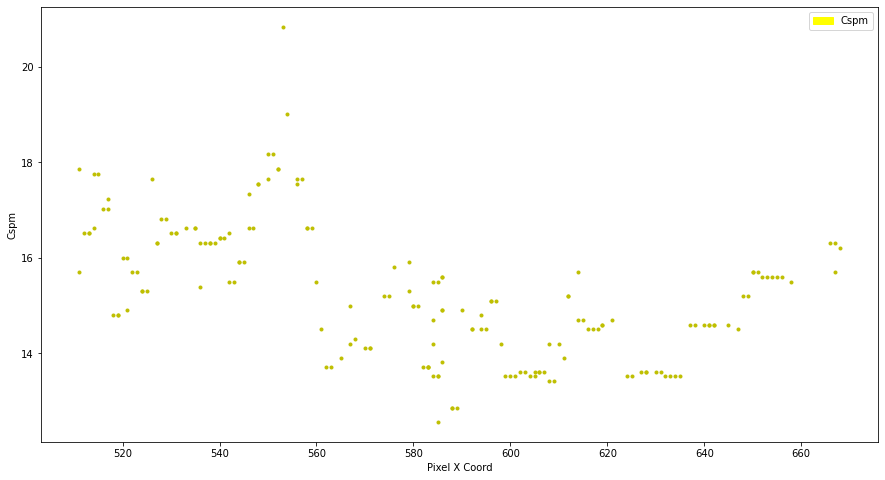

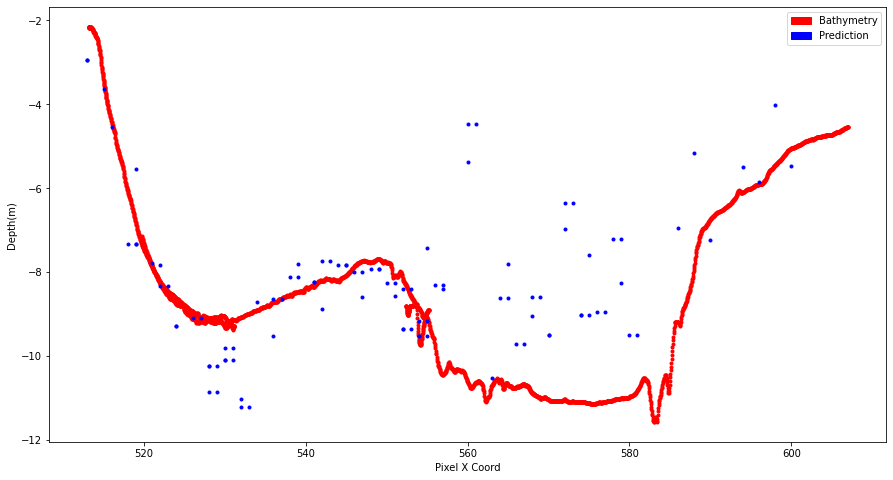

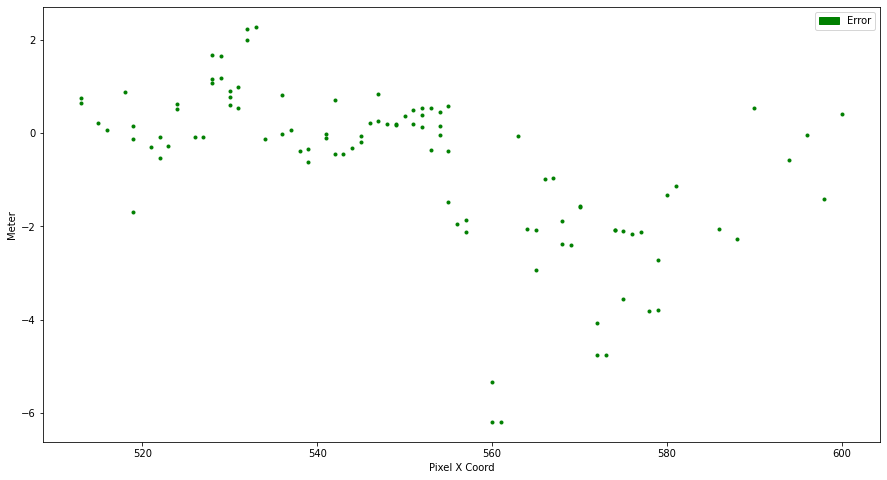

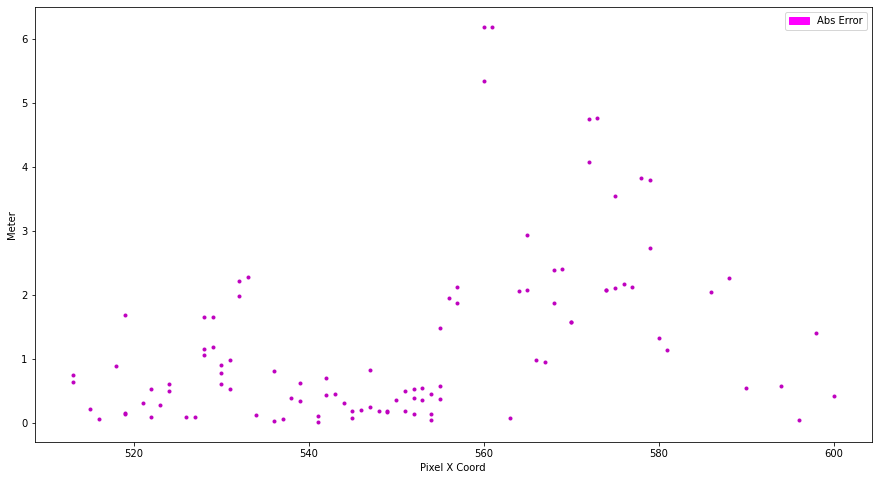

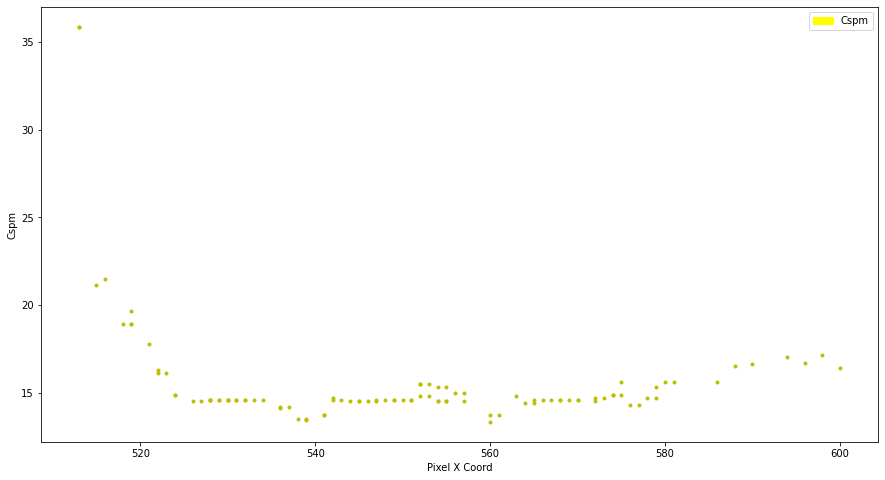

In [196]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data, coords, charts_path, maps_path, bat_data, transects_image)